In [1]:
import numpy as np
from numpy import e, log, dot
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
  return 1/(1+e**(-x))

In [3]:
def deriv_sigmoid(x):
  return (e**(-x))/(1+e**-x)**2

In [4]:
def cost(y,y_hat):
  logprobs = -(1/m)*np.sum((np.multiply(y,log(y_hat))+np.multiply((1-y),log(1-y_hat))))
  return logprobs

In [5]:
lr = 0.1
xor_input = np.array([[0,0],[0,1],[1,0],[1,1]])
xor_output = np.array([[1,0,0,1]])
X = xor_input.T
Y = xor_output
print(X.shape)
print(Y.shape)
output_dim = len(Y.T)
n0, m = X.shape

(2, 4)
(1, 4)


In [6]:
n1 = 5
W1 = np.random.random((n1,n0))
b1 = np.zeros((n1,1))

In [7]:
n2 = 1
W2 = np.random.random((n2,n1))
b2 = np.zeros((n2, 1))

In [8]:
noEpoches = 20000

In [9]:
Z1 = dot(W1,X)+b1
A1 = sigmoid(Z1)

In [10]:
print(W1.shape)
print(X.shape)
print(Z1.shape)
print(A1.shape)

(5, 2)
(2, 4)
(5, 4)
(5, 4)


In [11]:
Z2 = dot(W2,A1)+b2
A2 = sigmoid(Z2)

In [12]:
print(W2.shape)
print(A1.shape)
print(Z2.shape)
print(A2.shape)

(1, 5)
(5, 4)
(1, 4)
(1, 4)


In [13]:
dZ2 = A2-Y
dW2 = dot(dZ2,A1.T)/m
db2 = np.sum(dZ2, axis = 1, keepdims = True)

In [14]:
print(dZ2.shape)
print(dW2.shape)
print(db2.shape)

(1, 4)
(1, 5)
(1, 1)


In [15]:
dZ1 = np.multiply(dot(W2.T,dZ2),(A1*(1-A1)))
dW1 = dot(dZ1,X.T)/m

In [16]:
print(dZ1.shape)
print(dW1.shape)

(5, 4)
(5, 2)


In [17]:
db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims=True)

In [18]:
W1 = W1 -lr*dW1/m
W2 = W2 -lr*dW2/m
b1 = b1 -lr*db1/m
b2 = b2 - lr*db2/m

In [19]:
Cost= []
for i in range(noEpoches):
  
  Z1 = dot(W1,X)+b1
  A1 = sigmoid(Z1)
  Z2 = dot(W2,A1)+b2
  A2 = sigmoid(Z2)
  Cost.append(np.squeeze(cost(Y, A2)))
  dZ2 = A2-Y
  dW2 = dot(dZ2,A1.T)
  db2 = np.sum(dZ2, axis = 1, keepdims = True)
  dZ1 = np.multiply(dot(W2.T,dZ2),(A1*(1-A1)))
  dW1 = dot(dZ1,X.T)
  db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims=True)
  W1 = W1 -lr*dW1/m
  W2 = W2 -lr*dW2/n1
  b1 = b1 -lr*db1/m
  b2 = b2 - lr*db2/n1

In [20]:
predictions = np.round(A2)
predictions

array([[1., 0., 0., 1.]])

In [21]:
print(A2)

[[0.99888318 0.00784438 0.00765465 0.98780223]]


In [22]:
print(Y)

[[1 0 0 1]]


In [23]:
def prediction(X, W1, b1, W2, b2):
  Z1 = dot(W1,X)+b1
  A1 = sigmoid(Z1)
  Z2 = dot(W2,A1)+b2
  A2 = sigmoid(Z2)
  predictions = np.round(A2)
  return predictions

In [24]:
prediction(X, W1, b1, W2, b2)

array([[1., 0., 0., 1.]])

In [25]:
x_min, x_max = X[0, :].min()-2, X[0,:].max()+2
y_min, y_max = X[1, :].min()-2, X[1,:].max()+2

In [26]:
h = 0.1
print(X)

[[0 0 1 1]
 [0 1 0 1]]


In [27]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [28]:
Xn = (np.c_[xx.ravel(), yy.ravel()]).T
P = prediction(Xn, W1, b1, W2, b2)

In [29]:
print(P.shape)

(1, 2500)


In [30]:
P = P.reshape(xx.shape)
print(P.shape)

(50, 50)


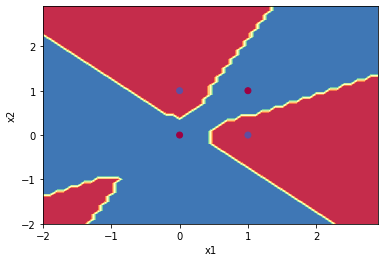

In [31]:
t = [1, 10, 10, 1]
plt.contourf(xx, yy, P, cmap = plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[0,:], X[1,:], c = t, cmap = plt.cm.Spectral)


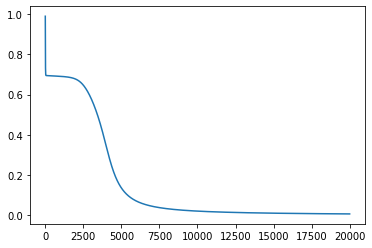

In [32]:
plt.plot(np.arange(len(Cost)), Cost)

In [33]:
X

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [34]:
np.concatenate((X,(np.ones((1, X.shape[1])))), axis = 0)

array([[0., 0., 1., 1.],
       [0., 1., 0., 1.],
       [1., 1., 1., 1.]])

In [35]:
(np.ones((1,X.shape[1])))

array([[1., 1., 1., 1.]])